In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

%matplotlib inline

import pandas_profiling

from geopy.geocoders import Nominatim

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split



In [171]:
#result_clean2.to_csv(r"df_clean.csv")

#fires_inpe_clean = pd.read_csv("datasets/df_clean.csv")
#fires_inpe_clean.head()


fires_inpe_clean = pd.read_csv('Datasets/df_clean.csv')
fires_inpe_clean.head()

,datahora,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,ACRE,AMAPA,AMAZONAS,...,RONDONIA,RORAIMA,TOCANTINS,AQUA,GOES,METOP,MSG,NOAA,NPP,TERRA
0,2019-09-03 17:48:00,0.0,0.0,0.0,-2.25394,-55.80126,2.2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-09-03 17:42:00,0.0,0.0,0.0,-13.18994,-60.12546,5.5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2019-09-03 17:48:00,0.0,0.0,0.0,-1.90173,-56.60860,5.2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2019-09-03 17:48:00,0.0,0.0,0.0,4.39931,-60.04727,4.9,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2019-09-03 17:48:00,0.0,0.0,0.0,4.39865,-60.05195,4.9,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [173]:
fires_inpe_clean.dtypes # i don´t know why, but is not saving as datetime

datahora         object
diasemchuva     float64
precipitacao    float64
riscofogo       float64
latitude        float64
longitude       float64
frp             float64
ACRE              int64
AMAPA             int64
AMAZONAS          int64
MARANHAO          int64
MATO GROSSO       int64
PARA              int64
RONDONIA          int64
RORAIMA           int64
TOCANTINS         int64
AQUA              int64
GOES              int64
METOP             int64
MSG               int64
NOAA              int64
NPP               int64
TERRA             int64
dtype: object

In [113]:
from datetime import datetime
fires_inpe_clean['datahora'] = pd.to_datetime(fires_inpe_clean['datahora'])

In [114]:
#fires_inpe_clean.dtypes
#fires_inpe_clean.head()

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
fires_inpe_clean.columns

Index(['datahora', 'diasemchuva', 'precipitacao', 'riscofogo', 'latitude',
       'longitude', 'frp', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO',
       'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA',
       'GOES', 'METOP', 'MSG', 'NOAA', 'NPP', 'TERRA'],
      dtype='object')

In [117]:
#fires_inpe_clean.isna().sum()

In [118]:
fires_inpe_clean.drop(columns = ['datahora'], inplace = True)

In [119]:
from sklearn.preprocessing import StandardScaler


In [120]:
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(fires_inpe_clean) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [121]:
# defining feature matrix(X) and response vector(y) 
X = fires_inpe_clean[['diasemchuva', 'precipitacao', 'riscofogo', 'latitude','longitude', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO','MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA','GOES', 'METOP', 'MSG', 'NOAA', 'NPP', 'TERRA']]

y= fires_inpe_clean['frp']



In [122]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [123]:
#from sklearn.preprocessing import RobustScaler
#transformer = RobustScaler().fit(X_train)
#X_train_scaled = transformer.transform(X_train)
#X_test_scaled = transformer.transform(X_test)



Linear regression:

In [124]:
# create linear regression object 

from sklearn import datasets, linear_model, metrics 

reg = linear_model.LinearRegression() 


In [125]:
# train the model using the training sets 
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Coefficients: 
 [ 4.20722805e-02 -1.92465119e-01 -2.33767724e-03 -2.39675398e-01
 -1.76063114e-01 -3.19250180e+00 -4.87137377e-01  1.47497460e+00
  1.76228028e+00 -1.95396531e-02  1.33186902e+00 -2.14929614e-01
 -9.87982012e-01  3.32966561e-01  4.46958639e+01 -1.49041955e+01
 -1.47980975e+01 -1.54335453e+01 -1.48062556e+01 -2.04771689e+00
  1.72939469e+01]
Variance score: 0.12152713056548015


Multiple Regression:

In [128]:
import numpy as np
from sklearn.linear_model import LinearRegression


Y = np.array(fires_inpe_clean['frp'])
X = np.array(fires_inpe_clean[['diasemchuva', 'precipitacao', 'riscofogo', 'latitude','longitude', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO','MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA','GOES', 'METOP', 'MSG', 'NOAA', 'NPP', 'TERRA']])
lm = LinearRegression()
model = lm.fit(X,Y)
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)
predictions  = lm.predict(X) 

Intercept:  88747247397.61057
Coef:  [ 4.05514695e-02 -1.98897895e-01 -2.13016516e-03 -2.41897797e-01
 -1.68927021e-01 -8.11820171e+10 -8.11820171e+10 -8.11820171e+10
 -8.11820171e+10 -8.11820171e+10 -8.11820171e+10 -8.11820171e+10
 -8.11820171e+10 -8.11820171e+10 -7.56523023e+09 -7.56523029e+09
 -7.56523029e+09 -7.56523029e+09 -7.56523029e+09 -7.56523028e+09
 -7.56523026e+09]


In [106]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

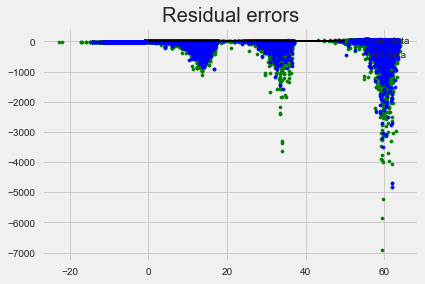

In [107]:
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

Polynomial Regression:

In [109]:
#from sklearn.preprocessing import PolynomialFeatures

#from sklearn.pipeline import make_pipeline

#create pipeline of Linear Regressions with Polynomial degrees from 1 to 4

#Standardized Values

#lin_models = {}
#scores = []
#for k in range(1,5):
#    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(k),LinearRegression())
#    model = poly_model.fit(X_train, y_train) #fit model
#    lin_models.update({str(k) : model})#store models in dict to access the best performing one
#    scores.append(model.score(X_test, y_test))#store scores for performance comparison
#    print("Poly Deg:",k, "R2:", model.score(X_test, y_test)) #evaluate performance with r2

Poly Deg: 1 R2: 0.11735929299698945
Poly Deg: 2 R2: 0.12665126886771183


MemoryError: Unable to allocate 21.8 GiB for an array with shape (1446088, 2024) and data type float64

To test the KNN (sample):

In [133]:
df_sample= fires_inpe_clean.sample(50000)
df_sample.head()
df_sample.shape

(50000, 22)

In [134]:
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(df_sample) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [135]:
X = df_sample[['diasemchuva', 'precipitacao', 'riscofogo', 'latitude','longitude', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO','MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA','GOES', 'METOP', 'MSG', 'NOAA', 'NPP', 'TERRA']]

y= df_sample['frp']

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [152]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor

rmse_val = [] #to store rmse values for different k
for K in range(5):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K) 

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 48.42787386412911
RMSE value for k=  2 is: 42.37353092143726
RMSE value for k=  3 is: 38.93692394259093
RMSE value for k=  4 is: 37.25491898226327
RMSE value for k=  5 is: 36.023826128827565


In [149]:
knnr = KNeighborsRegressor(n_neighbors = 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)

print(y_pred)

[3.7        4.26666667 0.         ... 2.16666667 0.         3.36666667]


In [144]:
#MAE

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

9.876130000000002

In [146]:
#MSE

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)


1516.0840461111109

In [164]:
#R^2


from sklearn.metrics import r2_score

X = df_sample[['diasemchuva', 'precipitacao', 'riscofogo', 'latitude','longitude', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO','MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA','GOES', 'METOP', 'MSG', 'NOAA', 'NPP', 'TERRA']]

y= df_sample['frp']

r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [12500, 10000]

In [153]:
#polynomial Regression with sample

X = df_sample[['diasemchuva', 'precipitacao', 'riscofogo', 'latitude','longitude', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO','MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA','GOES', 'METOP', 'MSG', 'NOAA', 'NPP', 'TERRA']]

y= df_sample['frp']

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

#create pipeline of Linear Regressions with Polynomial degrees from 1 to 4

#Standardized Values

lin_models = {}
scores = []
for k in range(1,5):
    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(k),LinearRegression())
    model = poly_model.fit(X_train, y_train) #fit model
    lin_models.update({str(k) : model})#store models in dict to access the best performing one
    scores.append(model.score(X_test, y_test))#store scores for performance comparison
    print("Poly Deg:",k, "R2:", model.score(X_test, y_test)) #evaluate performance with r2

Poly Deg: 1 R2: 0.15941929134180444
Poly Deg: 2 R2: 0.16819019159859427
Poly Deg: 3 R2: -66926884834.0114


MemoryError: Unable to allocate 3.77 GiB for an array with shape (40000, 12650) and data type float64

In [157]:
X = df_sample[['diasemchuva', 'precipitacao', 'riscofogo', 'latitude','longitude', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO','MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA','GOES', 'METOP', 'MSG', 'NOAA', 'NPP', 'TERRA']]

y= df_sample['frp']

In [159]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [160]:
for d in range(5):
    interaction = PolynomialFeatures(degree = d, include_bias = False, interaction_only = True)
    X_inter = interaction.fit_transform(X_train)
    
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state = 29)

ValueError: could not broadcast input array from shape (37500,21) into shape (37500,0)

In [161]:
interaction = PolynomialFeatures(degree = 3, include_bias = False, interaction_only = True)
X_inter = interaction.fit_transform(X_train)

In [163]:
from sklearn.pipeline import make_pipeline

for k in range(5):
    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(k), LinearRegression())
    model = poly_model.fit(X, y)

    print(poly_model.score(X_test, y_test))

ValueError: could not broadcast input array from shape (50000,21) into shape (50000,0)

Decision Tree

In [154]:
X = df_sample[['diasemchuva', 'precipitacao', 'riscofogo', 'latitude','longitude', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO','MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA','GOES', 'METOP', 'MSG', 'NOAA', 'NPP', 'TERRA']]

y= df_sample['frp']

In [156]:
# Create decision tree classifer object

from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(random_state = 29)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 29)
model = regr.fit(X_train, y_train)
regr.score(X_test, y_test)

-2.08839414720989

Using only the necessary Data:

In [184]:
from sklearn.feature_selection import RFE


In [185]:
X = df_sample[['diasemchuva', 'precipitacao', 'riscofogo', 'latitude','longitude', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO','MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA','GOES', 'METOP', 'MSG', 'NOAA', 'NPP', 'TERRA']]

y= df_sample['frp']

In [190]:
lr=linear_model.LinearRegression()
auto_model=lr.fit(X_train,y_train)

In [191]:
y_pred=auto_model.predict(X_train)
r2_score(y_train, y_pred)

0.10893621428202127

In [193]:
y_test_pred=auto_model.predict(X_test)
r2_score(y_test, y_test_pred)

0.16170697182933258

In [194]:
#Apply Features Reduction to best performing model: 
# Your code here:
estimator = auto_model
selector = RFE(estimator, 10, step=1)

In [195]:
selector = selector.fit(X, y)
selector.ranking_

array([11,  9, 12,  6,  8,  7,  1,  1,  5,  2,  3,  1,  4, 10,  1,  1,  1,
        1,  1,  1,  1])

In [196]:
df_sample.columns

Index(['diasemchuva', 'precipitacao', 'riscofogo', 'latitude', 'longitude',
       'frp', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA',
       'RONDONIA', 'RORAIMA', 'TOCANTINS', 'AQUA', 'GOES', 'METOP', 'MSG',
       'NOAA', 'NPP', 'TERRA'],
      dtype='object')

In [ ]:
df_sample.drop(['diasemchuva', 'precipitacao', 'riscofogo', 'latitude', 'longitude',])

In [182]:
auto.drop(['displacement','horse_power','weight'],axis=1,inplace=True)


NameError: name 'RFECV' is not defined